Your goal in this task is to implement a multi-class Neural network Classifier. 

In [2]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
import dmStyle
dmStyle.customize_mpl()


Setting custom matplotlib visual style


In [4]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

###Neural Network
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{1, 2, 3,\dots, k\})$.

Your goal in this assignment is to implement multi-class Neural NeTwork classifier. Specifically, we will be implementing a three-layer neural network. We will be using $1-in-k$ class representation and will be using $k$ output neurons for $k$ different classes. During training we will be representing each example's class label with a binary vector of $k$ dimensions with $j_th$ dimension to which example example will be set to 1. For instance, if an example has a label$=4$ and total number of classes are 6 then it's label during training will be represented by the vector =$[0,0,0,1,0,0]$

We will be using following cost function to measure the effectiveness of our learned system.  In other words, in Neural Network we try to optimize (minimize) following cost function (without regularization) to find the optimal decision boundary :


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} \lbrack -y_j^{(i)} \log(a^{(3)}_k(x^{(i)})) - (1-y_j^{(i)}) \log(1-a^{(3)}_k(x^{(i)})) \rbrack$$

Here $a^{(3)}_k$ is the $k_{th}$ neuron of 3rd layer of neural network. Recall that this cost function is identical to the cost function we have seen in the multi-class logistic regression, except here the cost function uses the output layer neurons instead of the usual single sigmoid function.

This also implies that we will be using the last layer neurons output as our hypotheses, and during testing the label of the hypothesis that gives highest score to a test example will be used as label of the test example.

To find the best set of parameters we will be using a gradient descent or stochastic gradient descent. For that to work, we will need to compute the derivatives of our cost function w.r.t to our parameter $\theta$'s$.

Now recall from your class that, derivatives for a single example will be:

$$
\begin{align}
\frac{\partial}{\partial \theta_{11}^{(2)}} J(W,b) &=\underbrace{\frac{1}{m}\left([ a^3_1(1-a^3_1)]\frac{(a^3_1-y_1)}{a^3(1-a^3_1)}\right)}_{\delta^{3}_1} a^{(2)}_1
 = \delta^{3}_1 a^{(2)}_1
\end{align}
$$
Similary

$$
\begin{align}
\frac{\partial}{\partial \theta_{12}^{(2)}} J(W,b) = \delta^{3}_1 a^{(2)}_2
\end{align}
$$

Thus the partial derivatives of the output layer can be written in a matrix-vector prodcut, i.e.
$$\begin{align}
\frac{\partial}{\partial \theta^{(2)}} J(W,b) = \delta^{3} * a^{(2)T}
\end{align}$$

Where $ \delta^{3}=\frac{1}{m} (a^3-y)$

Recall that we can similarly write the partial derivatives of first layer, i.e.
$$\begin{align}
\frac{\partial}{\partial \theta^{(1)}} J(W,b) = \delta^{2} * X^{T} \mbox{ ; You can substitue X with $a^1$ as well.}
\end{align}$$

Where $ \delta^{2}=\theta^{(2)T}*\delta^3 .* (a^2*(1-a^2))$. Here '$.*$' means element-wise multiplication and '$*$' means matrix-vector prodcut.

##Summary of Algorithm:

 - *Forward Pass:* In the forward pass you will compute the $a$'s, using following expressions:
     $a^2=\theta^1 * X$ and $a^3=\theta^2 * a^2$
 - *BackWard Pass:* In the backward pass you will compute the deltas and using those deltas you will find the derivatives of the cost function.
 
![Derivation of the gradients](Hand-Written-nn.jpg "Summary of the derivation")

*Remember to exclude the bias-term during the calculations of derivatives of $\theta^1$

In [52]:
import time 
def GradientDescent(X,Y,cost_function,derivative_cost_function,nparams,maxiter=20000, alpha=0.01, plotcf=True):

    eps=0.00001
    thetas=rand(nparams,1)
    # lets map the thetas to the range [-1,1]
    stime=time.time() # Get the Starting time...
    
    thetas= thetas*2-1  # output = input * range_output  + min_output

    theta_old=thetas
    theta_new=thetas+1

#     pai=int(maxniter / 200) # plot in total 200 number of points
    #print cf
    numiter=0
    costValue=[]
    numit=[]
    df=ones(thetas.shape)
    converged=False
    printIter=0
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad =derivative_cost_function(X,Y,theta_old)
        #theta_new=theta_old - (alpha*grad)
        for k in range(len(thetas)):
            theta_new[k]=theta_old[k] - alpha * grad[k]
        # Cost function with new thetas
        if printIter==numiter:
            printIter+=500
            
            e =cost_function(X,Y,theta_new)
            numit.append(numiter)
            costValue.append(e)
            print 'Value of Cost Function (obtained in {} iterations) is {}'.format(numiter,e)
        if np.linalg.norm(grad)<=eps:
            converged=True
     
        theta_old=theta_new
        numiter += 1  # update iter

        if numiter == maxiter:
            print 'Max interactions exceeded!'
            converged = True
    plt.plot(numit,costValue)    
    print 'Value of Cost Function at Minimum Points {}, is {}'.format(theta_new,e)
    print 'Total time taken ={:.4} seconds '.format(time.time()-stime) # difference between current and stored time
    return theta_new


In [53]:
import pdb
def one_of_k(ilabels):
    
    classes=np.unique(ilabels)
    
    nclasses=len(classes)
    
    olabels=np.zeros((ilabels.shape[0],nclasses))
    
    for i, l in enumerate(ilabels):        
        olabels[i,classes==l]=1
        
    return olabels

In [161]:
class NeuralNetwork:

    def __init__(self,ifeatdim,nnhlayer,classes,alpha=0.001,maxniter=20000,scalefeatures=False):        
        self.thetas=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        self.classes=np.unique(classes)

        self.nclasses=len(self.classes) # dimensions of output
        self.ifeatdim=ifeatdim # dimension of input features,
        self.nnhlayer=nnhlayer # number of neurons in hidden layer
        
        self.maxniter=maxniter
        self.alpha=alpha

        self.sl1theta= (nnhlayer, ifeatdim) # l1theta's shape, remember 1 is already added for bias terms
        self.sl2theta= (self.nclasses, nnhlayer+1) # l2thetas's shape, +1 for bias terms

        # thetas's for neurons + bias terms..
        
        self.nthetas= (self.nclasses * nnhlayer+ nnhlayer* self.ifeatdim) + (self.nclasses)
        
        assert(self.nthetas == np.product(self.sl1theta[:])+np.product(self.sl2theta[:])) # for debugging 

        pass
    
    def getnparam(self):
        
        return self.nthetas
    def unroll_thetas(self,thetas):

        l1theta= thetas[:np.product(self.sl1theta)].reshape(self.sl1theta)

        l2theta= thetas[np.product(self.sl1theta):].reshape(self.sl2theta)

        return l1theta, l2theta

    def roll_thetas(self,l1theta,l2theta):

        return np.concatenate( ( l1theta.ravel(),l2theta.ravel() )  )

    def forward_pass(self, X, thetas):

        l1theta,l2theta=self.unroll_thetas(thetas) # unroll the thetas...
        # layer 1 computations...
        a2=l1theta.dot(X)
       
        # append 1's for the bias terms...
        a2=np.vstack((a2,np.ones((1,a2.shape[1]))))
        a2=self.sigmoid(a2)
        #layer 2 computations...
        a3= l2theta.dot(a2)
        a3=self.sigmoid(a3)
        return a2,a3
    def sigmoid(self,z):

        z = maximum(minimum(16,z),-16) 
        return 1/(1+np.exp(-z))        
    
    
    def hypothesis(self, X,thetas):
    
        return (self.forward_pass(X,thetas))[1]
    
    def cost_function(self, X,Y, theta):

        m=X.shape[1]
        cost = (1.0/m) * np.sum((-Y * (np.log(self.hypothesis(X,theta))) - (1-Y)*(np.log(1-self.hypothesis(X,theta)))))
        return cost
    def derivative_cost_function(self,X,Y,thetas):

#         pdb.set_trace()
        #forward pass
        a2, a3=self.forward_pass(X,thetas)
        
        #now back-propogate 

        # unroll thetas
        l1theta,l2theta=self.unroll_thetas(thetas)
        nexamples=float(X.shape[1])
        
        # compute delta3, l2theta
        delta3= (a3-Y)/float(X.shape[1])
        L2theta = delta3.dot(a2.T)
        # compute delta2, l1theta
        delta2 = ((l2theta.T).dot(delta3)*a2*(1-a2))[:-1]
        L1theta =delta2.dot(X.T)
        
        #remember to exclude last element of delta2, representing the deltas of bias terms...
        # i.e. delta2=delta2[:-1]

        # roll thetas into a big vector
        thetas=(self.roll_thetas(L1theta,L2theta)) # return the same shape as you received
       
        return thetas

    def train(self, X, Y):
        
        
        nfeatures,nexamples=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        nY=one_of_k(Y.T) # get a n x k
        nparams=self.getnparam()
        print 'Calling Gradient Descent with following number of parameter={}'.format(nparams)
        self.thetas=GradientDescent(X,nY.T,self.cost_function,self.derivative_cost_function,self.getnparam(), self.maxniter,self.alpha)

    def predict(self, X):
        
        num_test = X.shape[1]
        
        if self.sl1theta[1]-X.shape[0] ==1:
            # append 1 at the end of each example for the bias term
            X=np.vstack((X,np.ones((1,X.shape[1]))))
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
        
        pred=self.hypothesis(X,self.thetas)
        
        maxrange=X.shape[1]
        Ypred=[]
        for l in range(0,maxrange):
            labelPred=np.argmax(pred[:,l])
            Ypred.append(self.classes[labelPred])

        return np.array(Ypred)
        
        #return np.array(Ypred).reshape((num_test,1))
    
    
    def scale_features(self,X):
 
        self.xmin= np.min(X,axis=1)
        self.xmax= np.max(X,axis=1)

        return (X-self.xmin)/(self.xmax-self.xmin)

#Non-Linear Binary Class Problem...

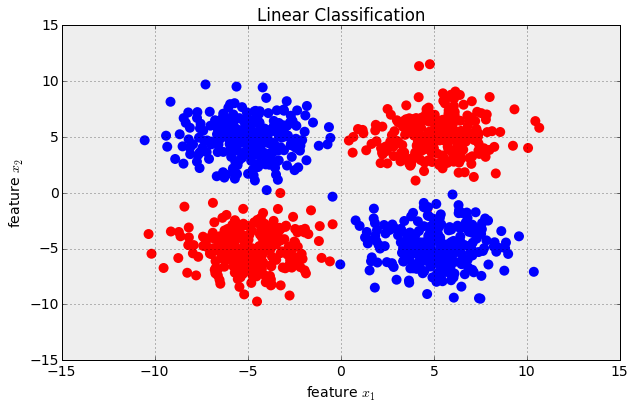

In [162]:
# Create some dummy data for testing

np.random.seed(seed=99)

# make some data up
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points
nexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='r', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='b', s=100)            



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class-nn.svg',format='svg')

In [163]:
print X.shape,Y.shape

(1000L, 2L) (1000L, 1L)


In [164]:
#Lets append a vector of dummy 1's at the end of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [165]:
print X.shape,Y.shape

(1000L, 3L) (1000L, 1L)


In [166]:
ook=one_of_k(Y)

In [167]:
ook

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [168]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function,nparams):
    thetas=np.random.rand(nparams,1)
#     import pdb
#     pdb.set_trace()
    ad=derivative_cost_function(X,Y,thetas)
    print ad
    eps=0.0001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
#         print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [169]:
%pdb off
nnclass=NeuralNetwork(3,2,[1, 2],alpha=0.01)

Automatic pdb calling has been turned OFF


In [170]:
print "Shape of Parameters in L1 of ={}".format(nnclass.sl1theta)
print "Shape of Parameters in L2 of ={}".format(nnclass.sl2theta)
print "Number of Parameters in Network ={}".format(nnclass.getnparam())

Shape of Parameters in L1 of =(2, 3)
Shape of Parameters in L2 of =(2, 3)
Number of Parameters in Network =12


In [171]:
print ook.shape

(1000L, 2L)


In [172]:
# %reset
# we will be sending transpose of the elements to make sure the data is presented in d X m format
%pdb off
test_derivative(X.T,ook.T,nnclass.cost_function,nnclass.derivative_cost_function,nnclass.getnparam())

Automatic pdb calling has been turned OFF
[ 0.0109557  -0.00855997  0.04195059  0.00919594 -0.00442803 -0.00870932
  0.12370253  0.12021732  0.10593335  0.17474439  0.17950515  0.20581391]
Computational derivatvie = [0.010955699470960312, -0.0085599741295183662, 0.041950587714723042, 0.0091959372383598748, -0.0044280295063980901, -0.0087093238021473951, 0.12370252566507034, 0.12021731965905502, 0.10593335381670066, 0.17474439109044226, 0.17950515475040341, 0.20581390566376534]
Analytical derivative = (12L,) [ 0.0109557  -0.00855997  0.04195059  0.00919594 -0.00442803 -0.00870932
  0.12370253  0.12021732  0.10593335  0.17474439  0.17950515  0.20581391]
Their difference= [  2.56466695e-10   4.22529262e-10  -1.64139605e-11  -1.22178163e-10
   7.66824972e-11   4.33595521e-12  -5.76085568e-11  -6.06059647e-11
  -4.03970885e-11  -5.12887510e-11  -5.44351786e-11  -5.11884701e-11]


Calling Gradient Descent with following number of parameter=12
Value of Cost Function (obtained in 0 iterations) is 1.44727056826
Value of Cost Function (obtained in 500 iterations) is 1.3726404464
Value of Cost Function (obtained in 1000 iterations) is 1.34456415404
Value of Cost Function (obtained in 1500 iterations) is 1.31432387781
Value of Cost Function (obtained in 2000 iterations) is 1.27489438218
Value of Cost Function (obtained in 2500 iterations) is 1.22394765127
Value of Cost Function (obtained in 3000 iterations) is 1.1622314495
Value of Cost Function (obtained in 3500 iterations) is 1.09294614159
Value of Cost Function (obtained in 4000 iterations) is 1.02025196141
Value of Cost Function (obtained in 4500 iterations) is 0.948223962124
Value of Cost Function (obtained in 5000 iterations) is 0.879848021385
Value of Cost Function (obtained in 5500 iterations) is 0.816740888728
Value of Cost Function (obtained in 6000 iterations) is 0.759481943159
Value of Cost Function (obtai

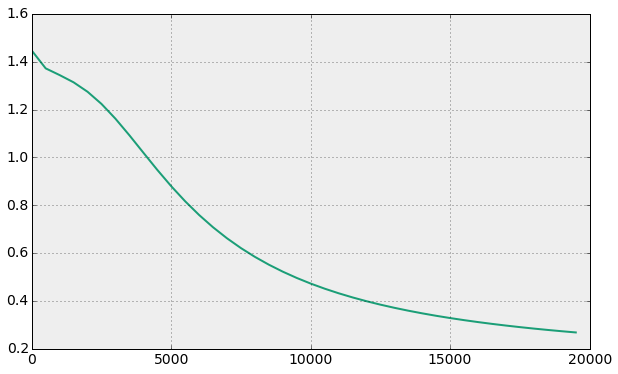

In [176]:
#once again sending the transpose of the training and testing matrix
nnclass.train(X.T,Y.T) # 


Automatic pdb calling has been turned OFF
(10000L, 2L)
[1 2]


(-9.7393883651341948, 11.525485655564363)

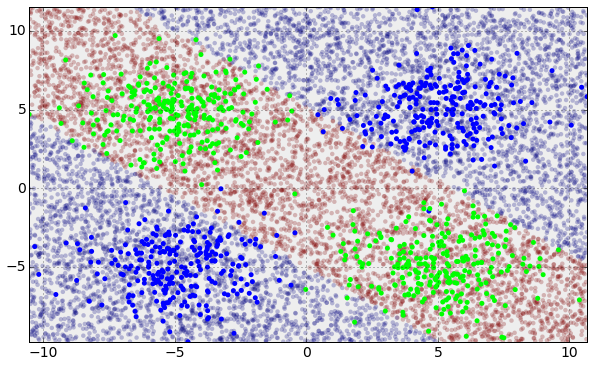

In [177]:
%pdb off
npts=10000
model=nnclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])
tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.shape

cs= model.predict(tx.T); # send the transpose of X during evaluation as well...
print  np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs.ravel(), alpha=.25)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
              c=list(map(lambda x:'blue' if x==1 else 'lime' if x==2 else 'r',Y)), 
              linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

#Three class problem

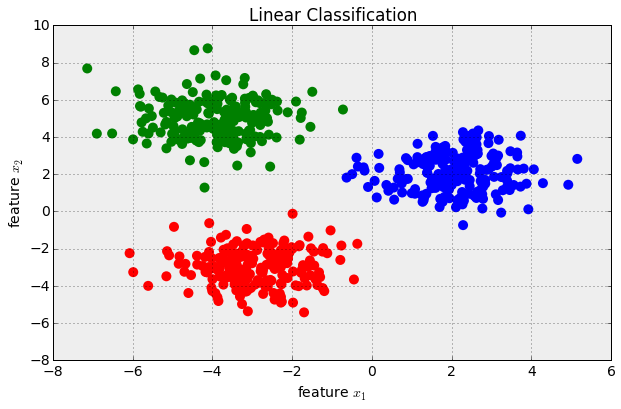

In [145]:
# Create some dummy data for training and testing

np.random.seed(seed=99)

# make some data up using Gaussian distribution...
mean1 = [-3,-3]
mean2 = [2,2]
mean3 = [-4,5]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=600
x1 = np.random.multivariate_normal(mean1,cov,nexamples/3)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/3)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/3)

X=np.vstack((x1,x2,x3))
Y=np.vstack((1*np.ones((nexamples/3,1)),2*np.ones((nexamples/3,1)),3*np.ones((nexamples/3,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='g', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class-nn.svg',format='svg')

In [146]:
print X.shape,Y.shape

(600L, 2L) (600L, 1L)


In [147]:
#Lets append a vector of dummy 1's at the end of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [148]:
ook=one_of_k(Y)

In [149]:
%pdb off
nnclass=NeuralNetwork(3,2,np.unique(Y),alpha=0.01)

Automatic pdb calling has been turned OFF


In [150]:
# %reset
%pdb off
test_derivative(X.T,ook.T,nnclass.cost_function,nnclass.derivative_cost_function,nnclass.getnparam())

Automatic pdb calling has been turned OFF
[-0.07329263  0.11891449  0.04233991 -0.07630899  0.09532536  0.0480248
  0.52065397  0.52219793  0.34397643  0.20172705  0.22986651  0.33054103
  0.18696177  0.17779256  0.29479099]
Computational derivatvie = [-0.073292633602228818, 0.11891449462009263, 0.042339910855115903, -0.076308989098716751, 0.095325360425224659, 0.048024798771084676, 0.52065396700218258, 0.52219793194474562, 0.3439764318047267, 0.20172704748855352, 0.22986651273759762, 0.33054102662299911, 0.1869617728056383, 0.17779255980121533, 0.29479098816675986]
Analytical derivative = (15L,) [-0.07329263  0.11891449  0.04233991 -0.07630899  0.09532536  0.0480248
  0.52065397  0.52219793  0.34397643  0.20172705  0.22986651  0.33054103
  0.18696177  0.17779256  0.29479099]
Their difference= [  2.50187648e-11   1.26885960e-09   1.64737252e-11  -1.40148811e-09
   1.99663740e-09   3.44584916e-11  -7.29778460e-11  -7.80264742e-11
  -5.09645104e-11  -7.68664854e-11  -7.78054843e-11  -5.7

Calling Gradient Descent with following number of parameter=15
Value of Cost Function (obtained in 0 iterations) is 2.27053663387
Value of Cost Function (obtained in 500 iterations) is 1.62914075796
Value of Cost Function (obtained in 1000 iterations) is 1.33837598004
Value of Cost Function (obtained in 1500 iterations) is 1.17088283196
Value of Cost Function (obtained in 2000 iterations) is 1.04124864764
Value of Cost Function (obtained in 2500 iterations) is 0.925224252137
Value of Cost Function (obtained in 3000 iterations) is 0.821997645183
Value of Cost Function (obtained in 3500 iterations) is 0.732636749938
Value of Cost Function (obtained in 4000 iterations) is 0.656532388679
Value of Cost Function (obtained in 4500 iterations) is 0.59208173718
Value of Cost Function (obtained in 5000 iterations) is 0.537443914647
Value of Cost Function (obtained in 5500 iterations) is 0.490909498315
Value of Cost Function (obtained in 6000 iterations) is 0.4510228098
Value of Cost Function (ob

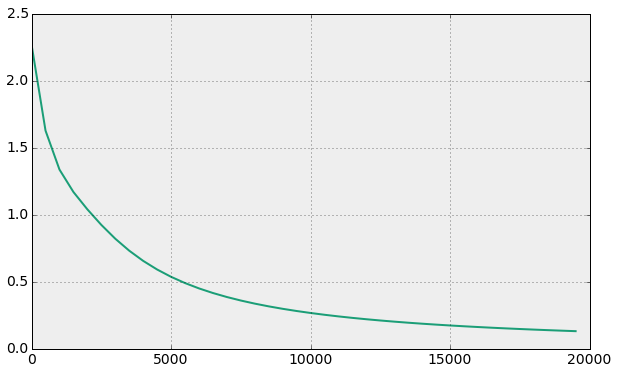

In [151]:
nnclass.train(X.T,Y.T) # c

## Let Plots the decision boundaries of the classes, using simple scatter plots... 

Automatic pdb calling has been turned OFF
(10000L, 2L)
[ 3.  1.  3. ...,  1.  3.  1.]
[ 1.  2.  3.]


(-5.4268033365281951, 8.7674908998331276)

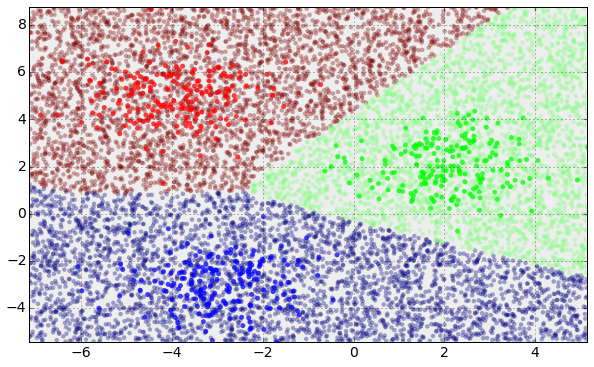

In [152]:
%pdb off
npts=10000
model=nnclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.shape
#pdb.set_trace()
cs= model.predict(tx.T);
print cs
print  np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs.ravel(), alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
              c=list(map(lambda x:'blue' if x==1 else 'lime' if x==2 else 'r',Y)), 
              linewidth=0,s=25,alpha=0.75)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

#Load Iris dataset and test the classifier on them...

In [153]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [154]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [155]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [156]:
feat=[2,3,4]
Y=Y.reshape((len(Y),1))

Calling Gradient Descent with following number of parameter=21
Value of Cost Function (obtained in 0 iterations) is 2.08239181359
Value of Cost Function (obtained in 500 iterations) is 1.626745697
Value of Cost Function (obtained in 1000 iterations) is 1.39250092904
Value of Cost Function (obtained in 1500 iterations) is 1.21912490651
Value of Cost Function (obtained in 2000 iterations) is 1.11318236374
Value of Cost Function (obtained in 2500 iterations) is 1.04598368085
Value of Cost Function (obtained in 3000 iterations) is 0.997406133609
Value of Cost Function (obtained in 3500 iterations) is 0.956731633237
Value of Cost Function (obtained in 4000 iterations) is 0.918426904385
Value of Cost Function (obtained in 4500 iterations) is 0.879866469356
Value of Cost Function (obtained in 5000 iterations) is 0.840154966352
Value of Cost Function (obtained in 5500 iterations) is 0.799363744564
Value of Cost Function (obtained in 6000 iterations) is 0.758041024785
Value of Cost Function (ob

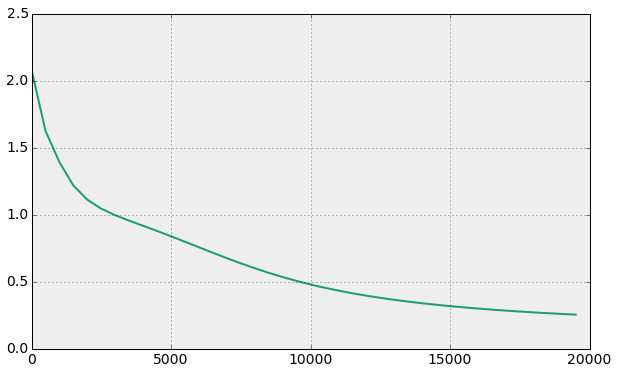

In [157]:
#%pdb
nnclass=NeuralNetwork(3,3,np.unique(Y),alpha=0.02)
nnclass.train(X[:,feat].T,Y.T)

In [158]:
def print_confusion_matrix(plabels,tlabels):
    import pandas as pd
    plabels = pd.Series(plabels)
    tlabels = pd.Series(tlabels)
    
    # draw a cross tabulation...
    df_confusion = pd.crosstab(tlabels,plabels, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    #print df_confusion
    return df_confusion

In [159]:
print_confusion_matrix((nnclass.predict(X[:,feat].T)).ravel(),Y.ravel())

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,49,0,0,49
Iris-versicolor,0,47,3,50
Iris-virginica,0,4,46,50
All,49,51,49,149


###Lets plot the decision boundaries

(10000L, 2L)
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


(0.10000000000000001, 2.5)

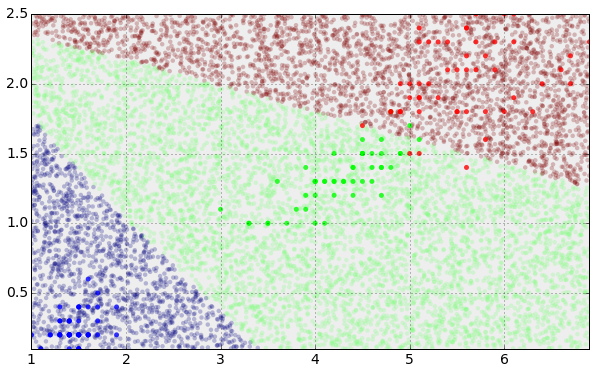

In [160]:
npts=10000
model=nnclass
ax=plt.gca()
x0spr = max(X[:,feat[0]])-min(X[:,feat[0]])
x1spr = max(X[:,feat[1]])-min(X[:,feat[1]])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,feat[0]])
tx[:,1] = tx[:,1]*x1spr + min(X[:,feat[1]])

print tx.shape
#pdb.set_trace()
cs= model.predict(tx.T);
# print cs
print  np.unique(cs)
mc=list(map(lambda x:1 if x=='Iris-setosa' else 2 if x=='Iris-versicolor' else 3,cs))
ax.scatter(tx[:,0],tx[:,1],c=mc, alpha=.25)

ax.hold(True)
ax.scatter(X[:,feat[0]],X[:,feat[1]],
               c=list(map(lambda x:'blue' if x=='Iris-setosa' else 'lime' if x=='Iris-versicolor' else 'r',Y)), 
               linewidth=0,s=25,alpha=0.8)
ax.set_xlim([min(X[:,feat[0]]), max(X[:,feat[0]])])
ax.set_ylim([min(X[:,feat[1]]), max(X[:,feat[1]])])